In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

df = pd.read_csv(r"C:\Mini_H\belajar\ecommerce-behavior-analysis\data\raw\ecommerce_customer_data_custom_ratios.csv")
print(df.head())

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      0  
1  Christine Hernandez   3

## Cleansing

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


- karena Purchase date bertipe object maka kita rubah menjadi date
- untuk return terdapat null lalu kita isi dengan 0 rubah juga tipe data nya menjadi int

In [5]:
# merubah Purchase Date jadi tipe date
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# mengisi data yang null di return dengan 0 lalu rubah tipe nya ke int
df['Returns'] = df['Returns'].fillna(0).astype(int)

# hapus kolom customer age
df = df.drop(columns=['Customer Age'])

# filter data dari bulan september 2023
df = df[df['Purchase Date'] < '2023-09-01']

In [7]:
# membuat kolom pendapatan bersih
df['Net Revenue'] = df['Total Purchase Amount'] * (1 - df['Returns'])

# ekstras waktu

df['Year'] = df['Purchase Date'].dt.year
df['Month_Year'] = df['Purchase Date'].dt.to_period('M')

#mengelompokan usia

def categorize_age(age):
    if age < 20: return 'Teenager'
    elif age < 30: return 'Young adult'
    elif age < 50: return 'Adult'
    else: return 'Senior'

df['Age Group'] = df['Age'].apply(categorize_age)

C:\Users\Mugis\AppData\Local\Temp\ipykernel_9164\645648077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', order=['Teenager', 'Young Adult', 'Adult', 'Senior'], palette='viridis')


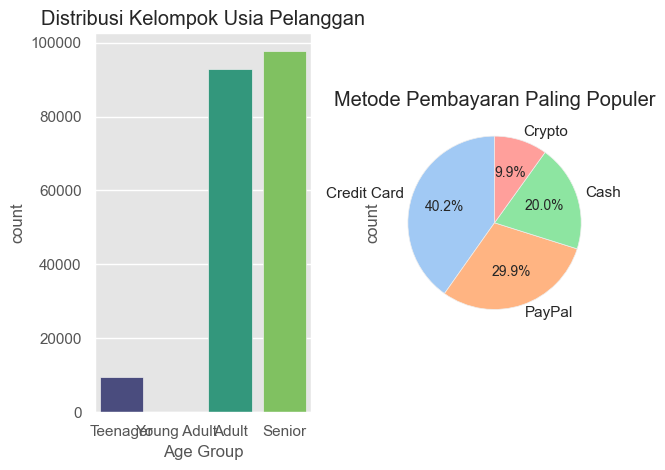

In [8]:
plt.Figure(figsize=(15, 5))

# distribusi kelompok usia
plt.subplot(1,2,1)
sns.countplot(data=df, x='Age Group', order=['Teenager', 'Young Adult', 'Adult', 'Senior'], palette='viridis')
plt.title('Distribusi Kelompok Usia Pelanggan')

# Proporsi metode pembayaran
plt.subplot(1,2,2)
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Metode Pembayaran Paling Populer')

plt.tight_layout()
plt.show()

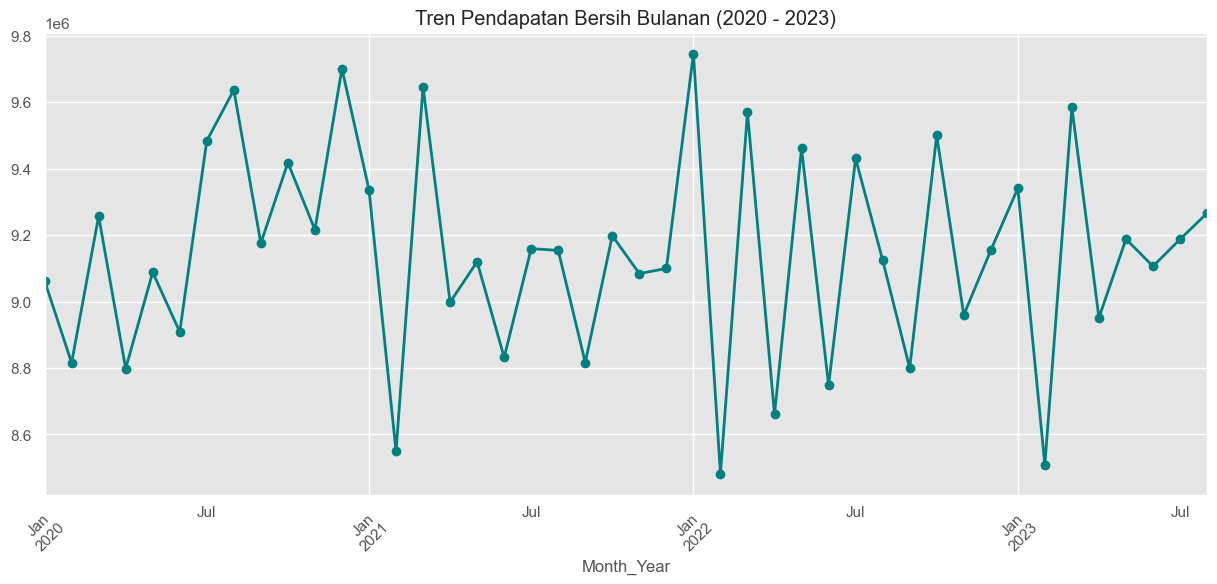

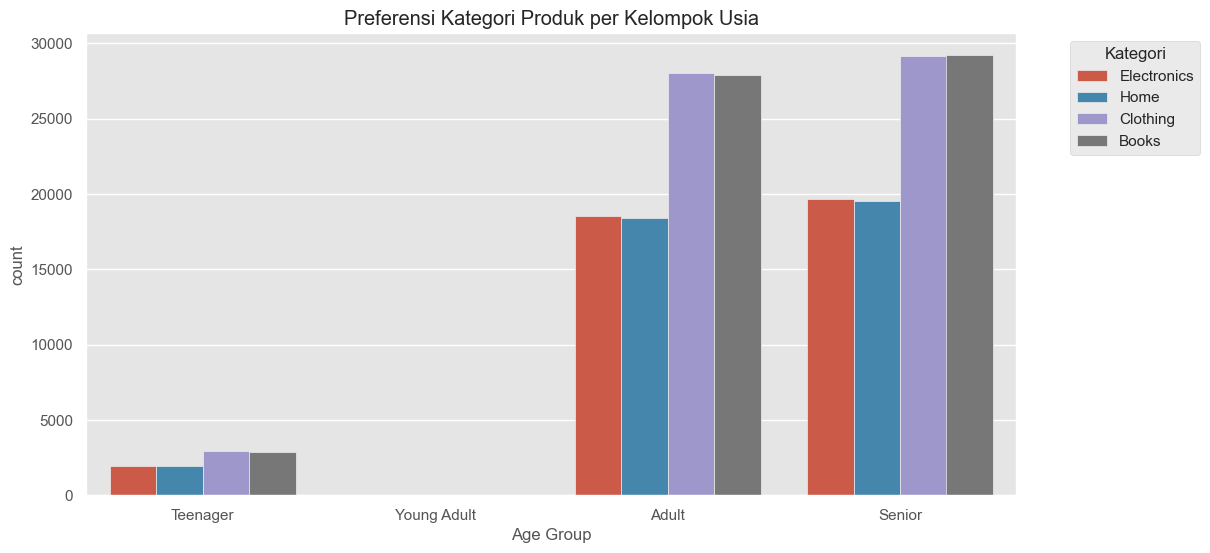

In [9]:
# 1. Tren Pendapatan Bulanan
plt.figure(figsize=(15, 6))
monthly_sales = df.groupby('Month_Year')['Net Revenue'].sum()
monthly_sales.plot(kind='line', marker='o', color='teal', linewidth=2)
plt.title('Tren Pendapatan Bersih Bulanan (2020 - 2023)')
plt.xticks(rotation=45)
plt.show()

# 2. Kategori Produk Berdasarkan Kelompok Usia
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', hue='Product Category', order=['Teenager', 'Young Adult', 'Adult', 'Senior'])
plt.title('Preferensi Kategori Produk per Kelompok Usia')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

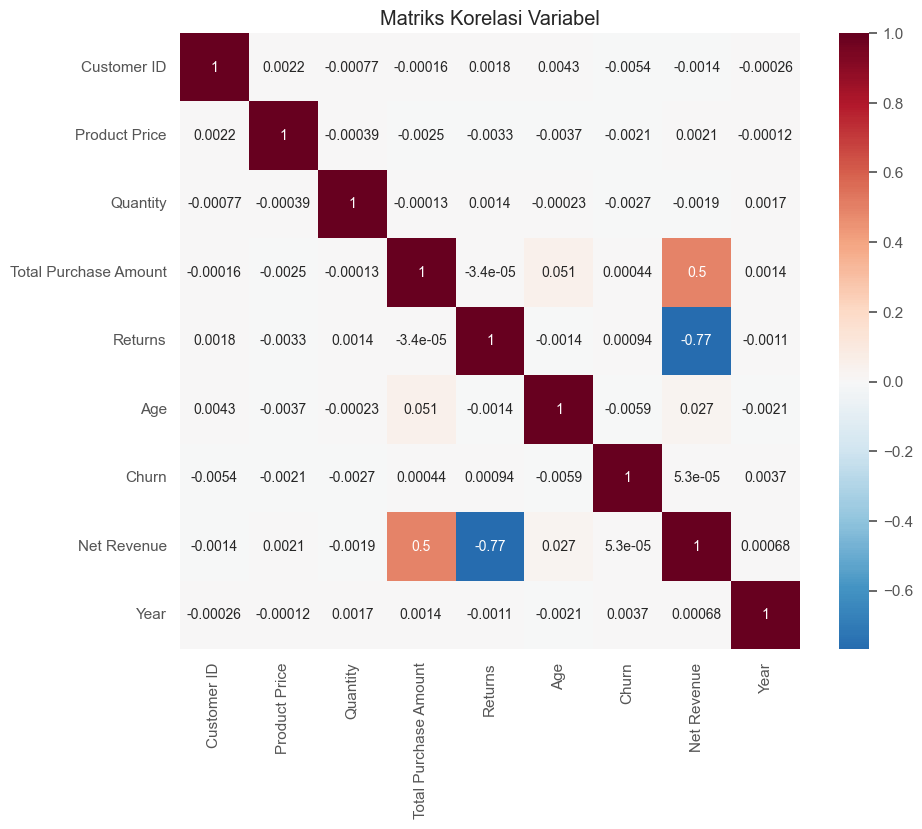

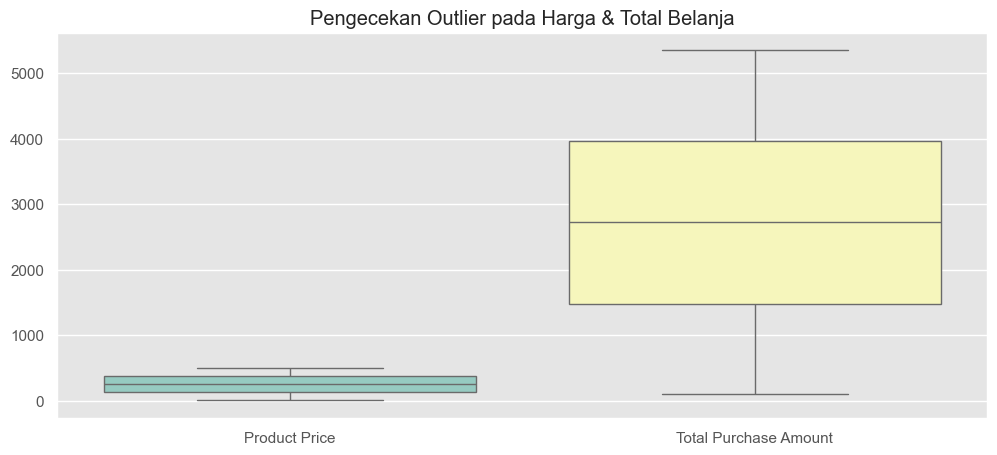

In [10]:
# 1. Heatmap Korelasi Numerik
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Matriks Korelasi Variabel')
plt.show()

# 2. Cek Outlier
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Product Price', 'Total Purchase Amount']], palette='Set3')
plt.title('Pengecekan Outlier pada Harga & Total Belanja')
plt.show()

In [11]:
import os
os.makedirs('../data/processed', exist_ok=True)

# Simpan hasil akhir yang sudah sangat bersih
df.to_csv('../data/processed/ecommerce_cleaned.csv', index=False)
print("✅ SEMUA PROSES EDA SELESAI!")
print("Data siap digunakan untuk modeling di: data/processed/ecommerce_cleaned.csv")

✅ SEMUA PROSES EDA SELESAI!
Data siap digunakan untuk modeling di: data/processed/ecommerce_cleaned.csv
